**Note: To anyone who want to try out this code. Please access the dataset from this [link](https://drive.google.com/drive/folders/1MgleseGheC5JncRvoPQDIT3OMjTsRvAE?usp=sharing) and add the shared data folder as shortcut to your drive. After doing this you are all set to run this code.**

# TASK #1: PROJECT OVERVIEW


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


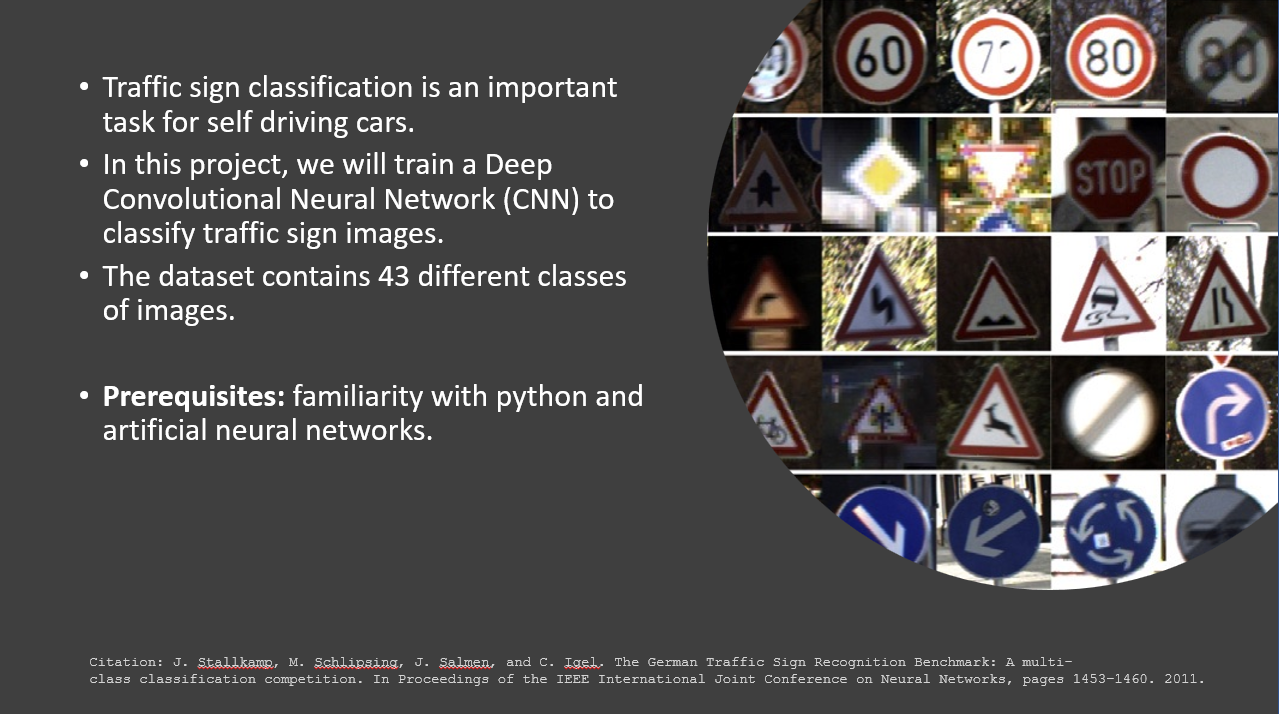

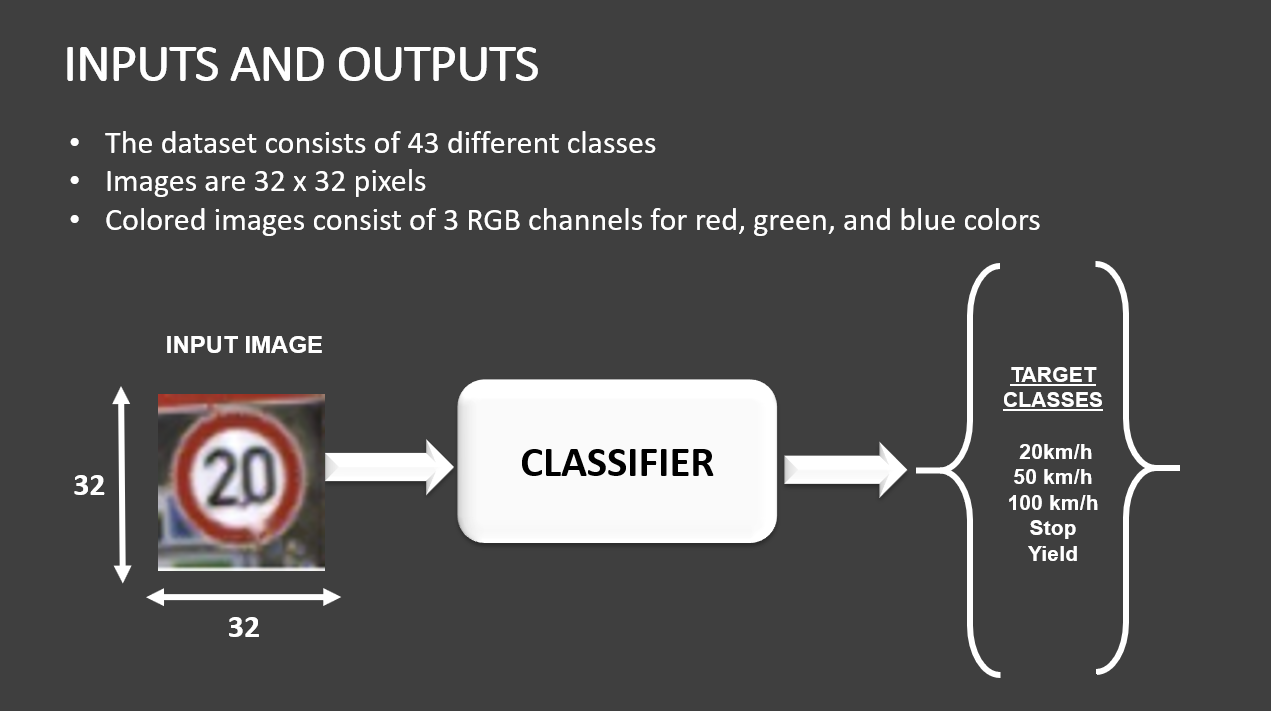

# TASK #2: IMPORT LIBRARIES/DATASETS

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


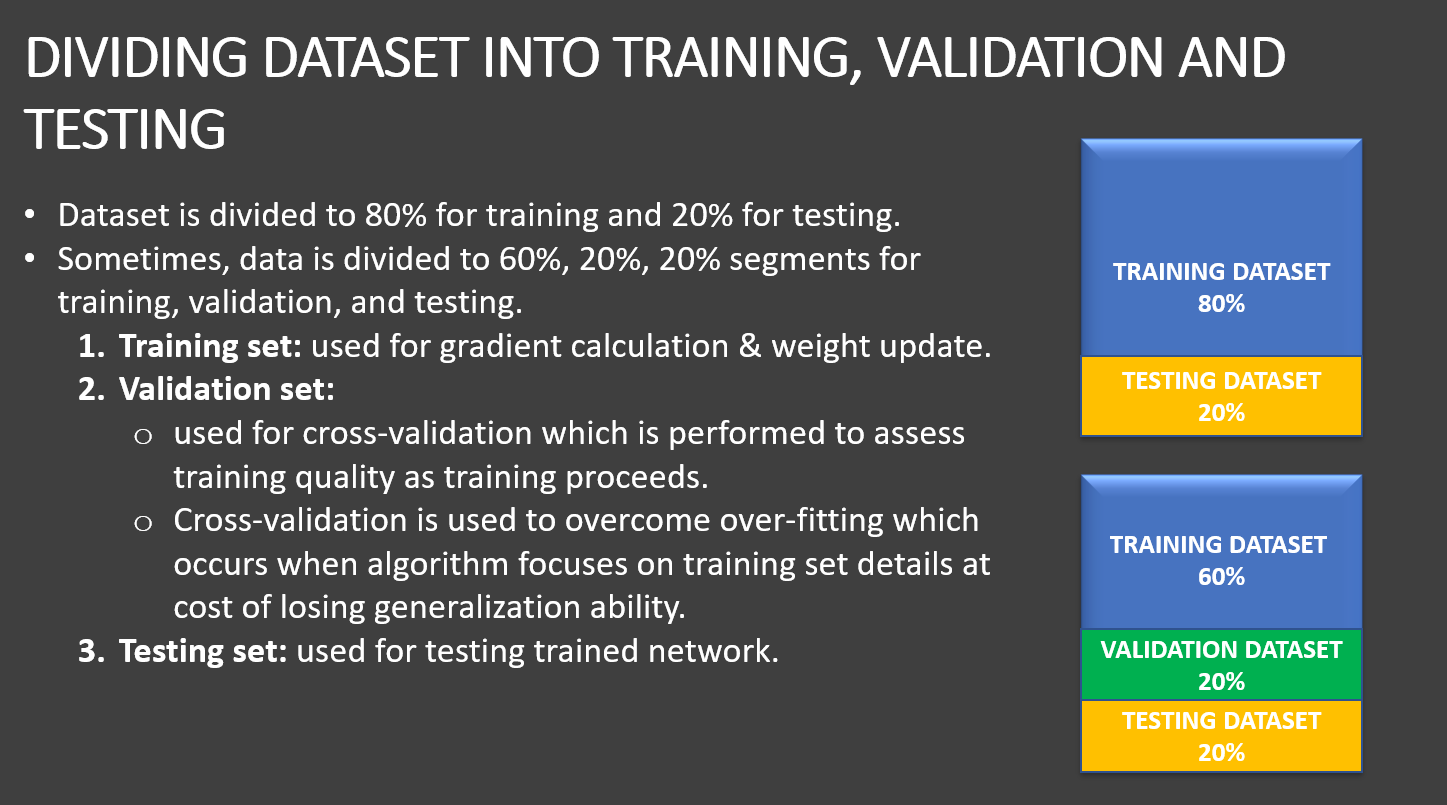

In [ ]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
x_train,y_train = train['features'],train['labels']
x_valid,y_valid = valid['features'],valid['labels']
x_test,y_test = test['features'],test['labels']

In [ ]:
x_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

6

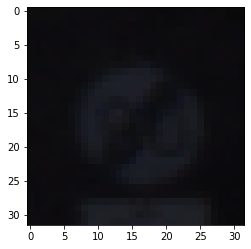

In [ ]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

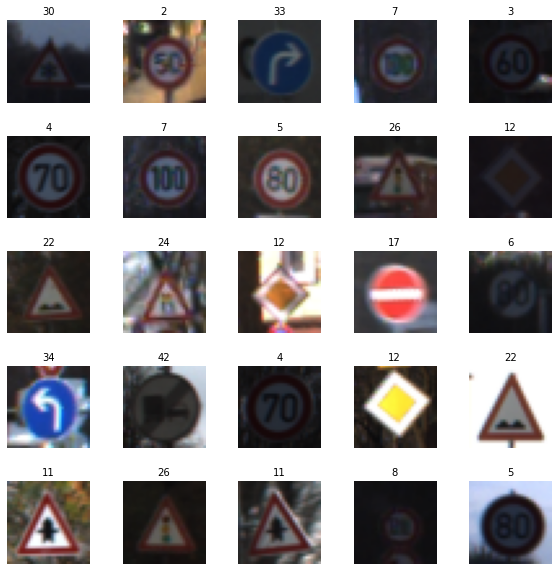

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables
for i in range(W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0, len(x_train))
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=10)
    axes[i].axis('off')
    # read and display an image with the selected index
plt.subplots_adjust(hspace=0.4)



# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
x_train_gray_norm = (np.sum(x_train/3,axis=3,keepdims=True)-128)/128
x_test_gray_norm = (np.sum(x_test/3,axis=3,keepdims=True) - 128)/128
x_valid_gray_norm = (np.sum(x_valid/3,axis=3,keepdims=True) - 128)/128

In [ ]:
x_train_gray_norm

array([[[[-0.34635417],
         [-0.52604167],
         [-0.61979167],
         ...,
         [-0.6953125 ],
         [-0.69791667],
         [-0.6953125 ]],

        [[-0.515625  ],
         [-0.375     ],
         [-0.38020833],
         ...,
         [-0.68489583],
         [-0.6953125 ],
         [-0.69791667]],

        [[-0.58854167],
         [-0.47916667],
         [-0.421875  ],
         ...,
         [-0.69791667],
         [-0.6953125 ],
         [-0.6953125 ]],

        ...,

        [[-0.6875    ],
         [-0.69270833],
         [-0.65885417],
         ...,
         [-0.68489583],
         [-0.69791667],
         [-0.6953125 ]],

        [[-0.69010417],
         [-0.69270833],
         [-0.68229167],
         ...,
         [-0.68489583],
         [-0.66145833],
         [-0.6484375 ]],

        [[-0.69270833],
         [-0.69270833],
         [-0.6953125 ],
         ...,
         [-0.64583333],
         [-0.63541667],
         [-0.62760417]]],


       [[[-0.70052083],


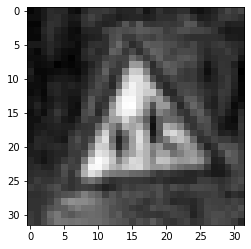

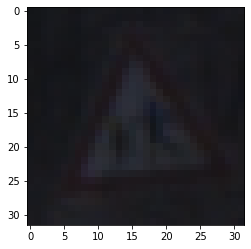

In [ ]:
i = random.randint(1, len(x_train_gray_norm))
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS

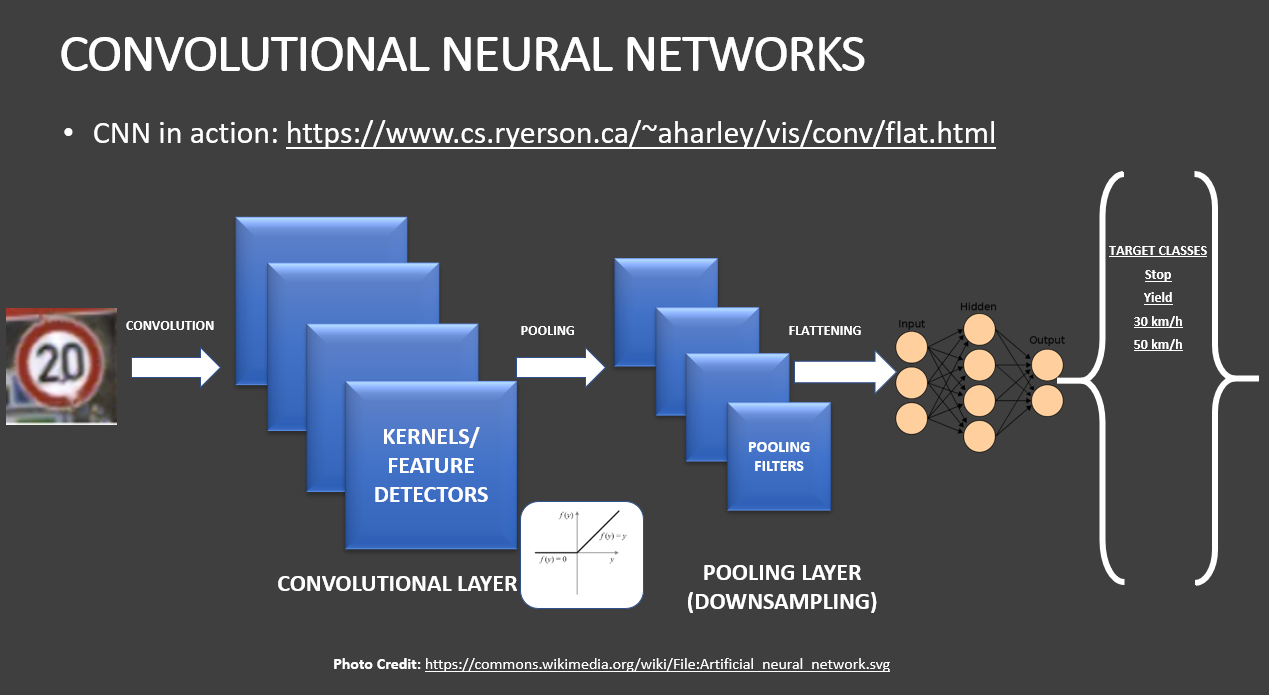![image.png](attachment:image.png)

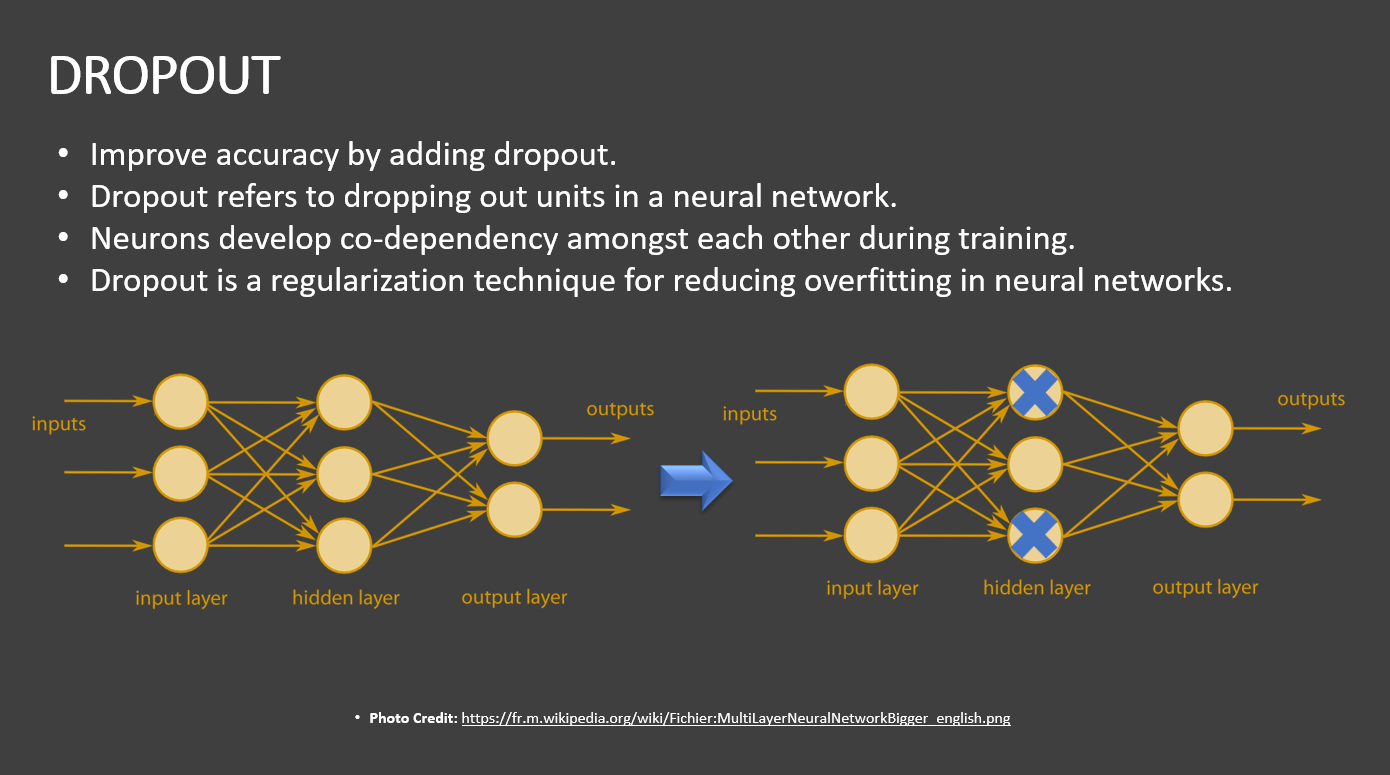![image.png](attachment:image.png)

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential([layers.Conv2D(6,(5,5),activation='tanh',input_shape=(32,32,1)),
                         layers.AveragePooling2D(),
                         layers.Dropout(0.2),
                         layers.Conv2D(16,(5,5),activation='tanh'),
                         layers.AveragePooling2D(),
                         layers.Flatten(),
                         layers.Dense(120,activation='tanh'),
                         layers.Dense(84,activation='tanh'),
                         layers.Dense(43,activation='softmax')])
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [ ]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = CNN.fit(x_train_gray_norm,
                  y_train,
                  batch_size = 500,
                  epochs=50,
                  validation_data=(x_valid_gray_norm,y_valid))

Epoch 1/50
70/70 [==============================] - 1s 17ms/step - loss: 2.5701 - accuracy: 0.3441 - val_loss: 1.5976 - val_accuracy: 0.5782
Epoch 2/50
70/70 [==============================] - 1s 12ms/step - loss: 1.0854 - accuracy: 0.7307 - val_loss: 0.8570 - val_accuracy: 0.7748
Epoch 3/50
70/70 [==============================] - 1s 12ms/step - loss: 0.6704 - accuracy: 0.8361 - val_loss: 0.6437 - val_accuracy: 0.8193
Epoch 4/50
70/70 [==============================] - 1s 11ms/step - loss: 0.4941 - accuracy: 0.8813 - val_loss: 0.5262 - val_accuracy: 0.8594
Epoch 5/50
70/70 [==============================] - 1s 11ms/step - loss: 0.3903 - accuracy: 0.9081 - val_loss: 0.4502 - val_accuracy: 0.8773
Epoch 6/50
70/70 [==============================] - 1s 11ms/step - loss: 0.3165 - accuracy: 0.9257 - val_loss: 0.4071 - val_accuracy: 0.8900
Epoch 7/50
70/70 [==============================] - 1s 11ms/step - loss: 0.2639 - accuracy: 0.9401 - val_loss: 0.3838 - val_accuracy: 0.8952
Epoch 8/50
70

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE

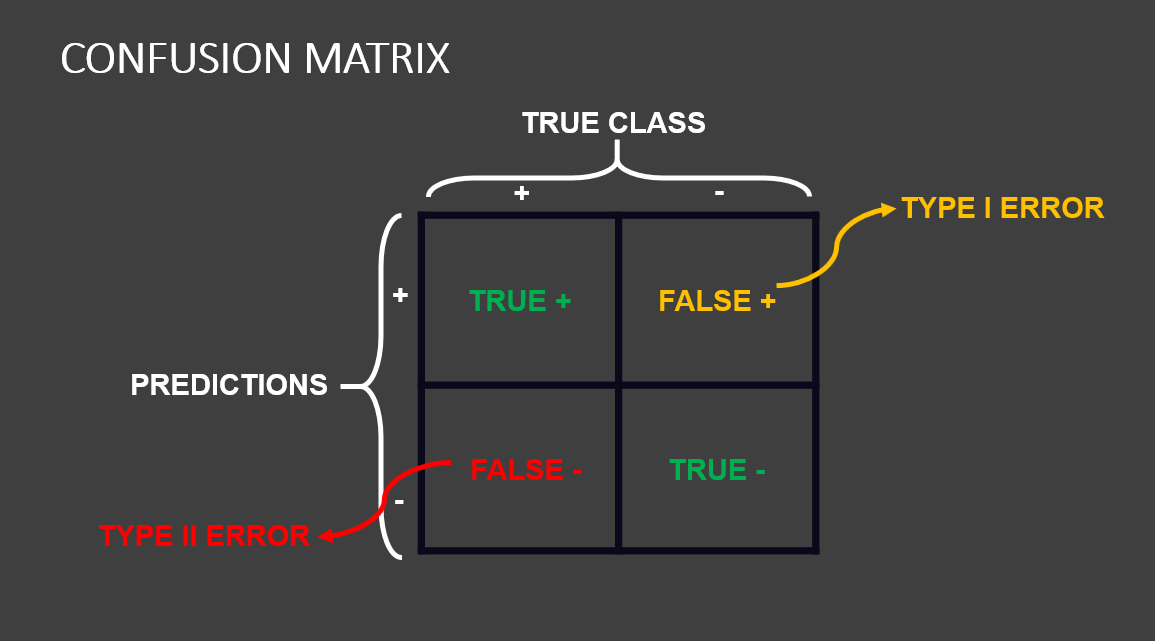

In [ ]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.9078
Test Accuracy: 0.9078384637832642


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'train_acc vs valid_acc')

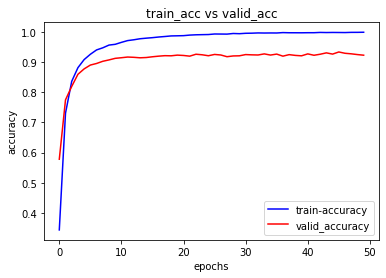

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'b',label='train-accuracy')
plt.plot(epochs,val_accuracy,'r',label='valid_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs valid_acc')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


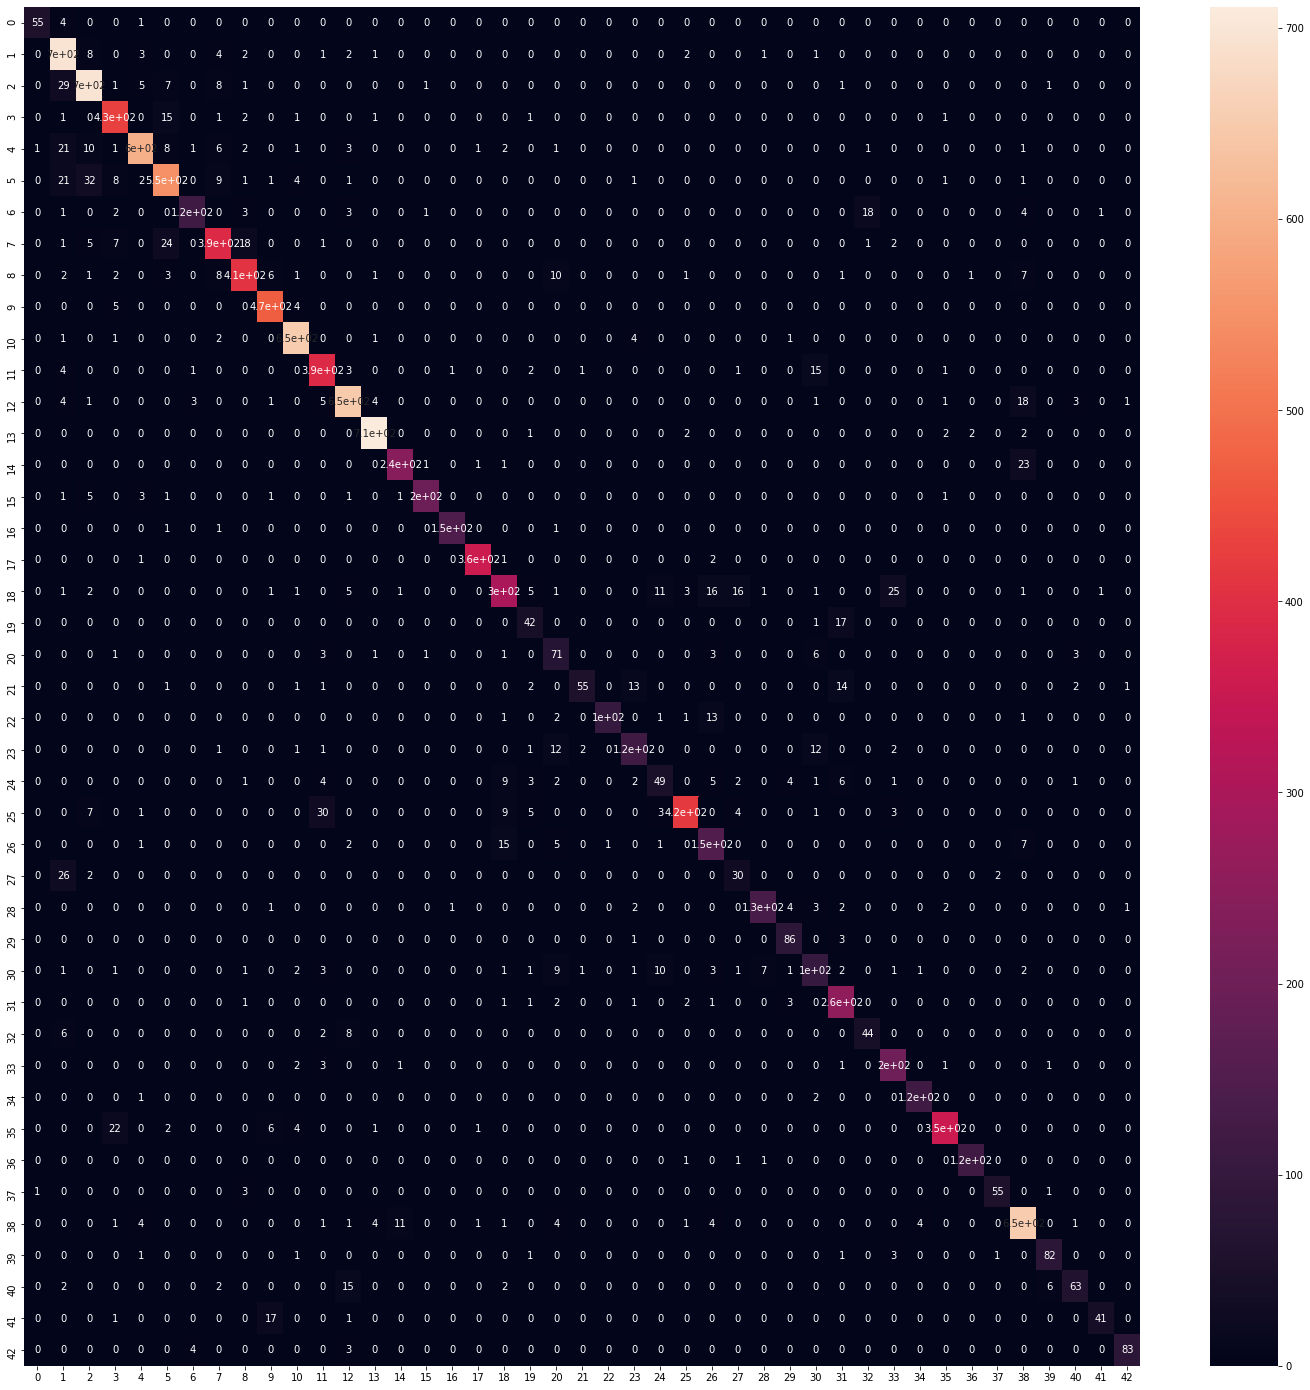

In [ ]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

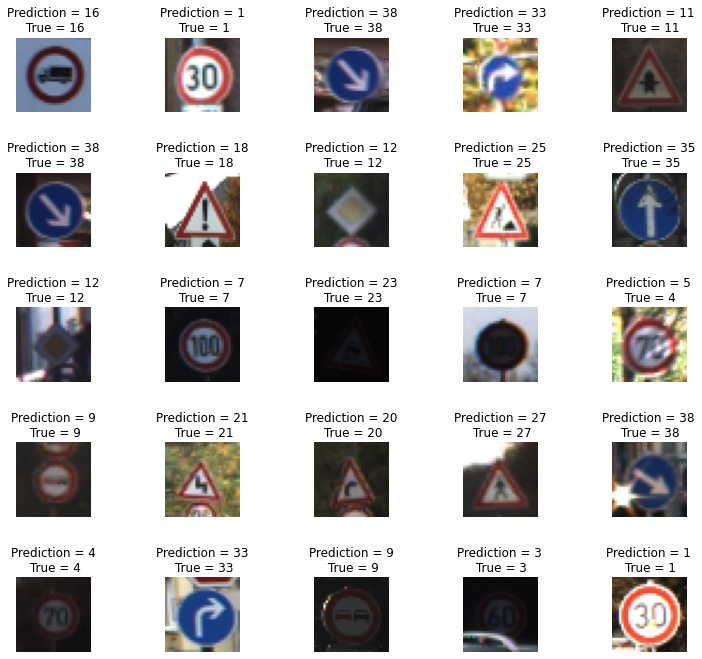

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

# TASK #9: SAVING AND LOADING MODEL TO PREDICT

In [ ]:
CNN.save('sign_model.h5')

In [ ]:
LeNet = models.load_model('sign_model.h5')

Text(0.5, 1.0, 'Prediction = 2\n True = 2')

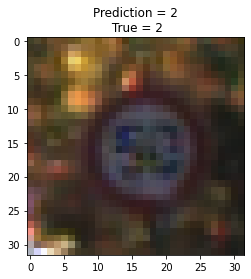

In [ ]:
index = np.random.randint(0, len(x_test))
predicted_class = LeNet.predict(np.array([x_test_gray_norm[index]]))
plt.imshow(x_test[index].squeeze())
plt.title('Prediction = {}\n True = {}'.format(np.argmax(predicted_class), y_test[index]))

# So this is how we can use Convnets to classify things

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images.
- Classes are as listed below:
  - 0 = Speed limit (20km/h)
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h)
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h)
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }